# Laboratory 2 - Introduction to Numerical Methods for Data Science

## Week 2 - Numerical Errors

The goal of this laboratory is to get familiar with the accuracy of floating point operations and two sources of numerical errors:

- Round-off Errors
- Truncation Errors

After completing the laboratory you should understand what is the source of these errors and how to minimize them during the computations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Task 1 - Machine Epsilon

Write a function that takes floating point type as the input and estimates machine eposilon associated with the type (Do not use built-in functions / properties for machine epsilon). Think how to minimize the number of iterations. The estimation does not have to be fully accurate.

In [ ]:
def machine_epsilon(dtype):
    initial_value = 2
    m_e = 0.5
    while initial_value + m_e != initial_value:
        m_e /= 2
    return m_e


2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16


Test the implementation:

In [ ]:
epsilon_f16 = machine_epsilon(np.float16)
epsilon_f32 = machine_epsilon(np.float32)
epsilon_f64 = machine_epsilon(np.float64)

print(f"Epsilon F16: {epsilon_f16}")
print(f"Epsilon F32: {epsilon_f32}")
print(f"Epsilon F64: {epsilon_f64}")

Epsilon F16: 2.220446049250313e-16
Epsilon F32: 2.220446049250313e-16
Epsilon F64: 2.220446049250313e-16


Machine epsilon is quite important concept related to round-off errors. Remember that all floating point representations have their own machine epsilon. Accuracy of your computations cannot go beyond the machine epsilon.

### Task 2 - Truncation Error - Maclaurin Series - Part I

Estimate the truncation error of Maclaurin series expansion for two functions: $cos(x)$ and $sin(x)$ at $x = 0.2$ using single precision float.
Prepare an error plot presenting the relative truncation error with respect to the number of expansion terms (from 0 to 10).

Estimating cos(0.20000000298023224)..
Real value: 0.9800665974617004
Terms: 1 Relative Error: [6.793252e-05]
Terms: 2 Relative Error: [6.081693e-08]
Terms: 3 Relative Error: [0.]
Terms: 4 Relative Error: [0.]
Terms: 5 Relative Error: [0.]
Terms: 6 Relative Error: [0.]
Terms: 7 Relative Error: [0.]
Terms: 8 Relative Error: [0.]
Terms: 9 Relative Error: [0.]

Estimating sin(0.20000000298023224)..
Real value: 0.19866932928562164
Terms: 1 Relative Error: [0.00669793]
Terms: 2 Relative Error: [1.3350861e-05]
Terms: 3 Relative Error: [7.500484e-08]
Terms: 4 Relative Error: [7.500484e-08]
Terms: 5 Relative Error: [7.500484e-08]
Terms: 6 Relative Error: [7.500484e-08]
Terms: 7 Relative Error: [7.500484e-08]
Terms: 8 Relative Error: [7.500484e-08]
Terms: 9 Relative Error: [7.500484e-08]


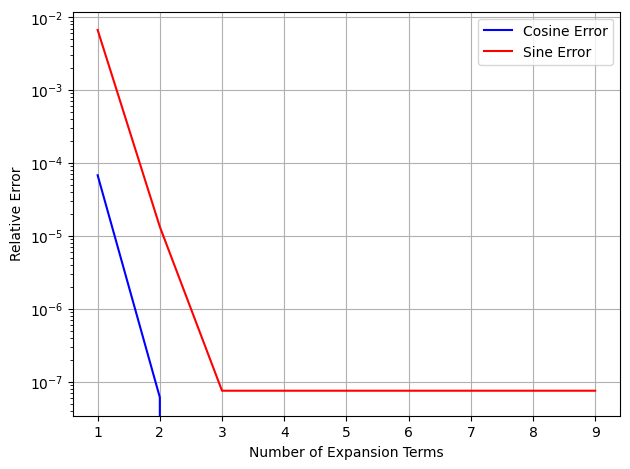

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.float32(0.2)  # Ensure x is in single precision
true_sin_value = np.float32(math.sin(x))
true_cos_value = np.float32(math.cos(x))

num_terms = 10  # Number of terms in the Maclaurin series

# Estimating cos(0.2)
print(f"Estimating cos({x})..")
print(f"Real value: {true_cos_value}")

approx_value_cos = np.float32(1.0)  # First term of Maclaurin series for cos
errors_cos = []

for i in range(1, num_terms):
    term = np.float32((-1) ** i * (x ** (2 * i)) / np.float32(math.factorial(2 * i)))
    approx_value_cos += term
    error = np.abs((true_cos_value - approx_value_cos) / true_cos_value)
    errors_cos.append(np.array([error], dtype=np.float32))  # Ensure it's single precision
    print(f"Terms: {i} Relative Error: {errors_cos[-1]}")

# Estimating sin(0.2)
print(f"\nEstimating sin({x})..")
print(f"Real value: {true_sin_value}")

approx_value_sin = np.float32(0.0)  # First term of Maclaurin series for sin
errors_sin = []

for i in range(1, num_terms):
    term = np.float32((-1) ** (i - 1) * (x ** (2 * i - 1)) / np.float32(math.factorial(2 * i - 1)))
    approx_value_sin += term
    error = np.abs((true_sin_value - approx_value_sin) / true_sin_value)
    errors_sin.append(np.array([error], dtype=np.float32))  # Ensure it's single precision
    print(f"Terms: {i} Relative Error: {errors_sin[-1]}")

# Plotting the errors
plt.plot(range(1, num_terms), errors_cos, label='Cosine Error', color='blue')
plt.plot(range(1, num_terms), errors_sin, label='Sine Error', color='red')

plt.xlabel('Number of Expansion Terms')
plt.ylabel('Relative Error')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Expected output:

Estimating cos(0.2)..
Real value: 0.9800665778412416
Terms: 1 Relative Error: [0.02033882]
Terms: 2 Relative Error: [6.793252e-05]
Terms: 3 Relative Error: [6.793252e-05]
Terms: 4 Relative Error: [6.081693e-08]
Terms: 5 Relative Error: [6.081693e-08]
Terms: 6 Relative Error: [0.]
Terms: 7 Relative Error: [0.]
Terms: 8 Relative Error: [0.]
Terms: 9 Relative Error: [0.]

Estimating sin(0.2)..
Real value: 0.19866933079506122
Terms: 1 Relative Error: [0.00669793]
Terms: 2 Relative Error: [0.00669793]
Terms: 3 Relative Error: [1.3350861e-05]
Terms: 4 Relative Error: [1.3350861e-05]
Terms: 5 Relative Error: [7.500484e-08]
Terms: 6 Relative Error: [7.500484e-08]
Terms: 7 Relative Error: [7.500484e-08]
Terms: 8 Relative Error: [7.500484e-08]
Terms: 9 Relative Error: [7.500484e-08]


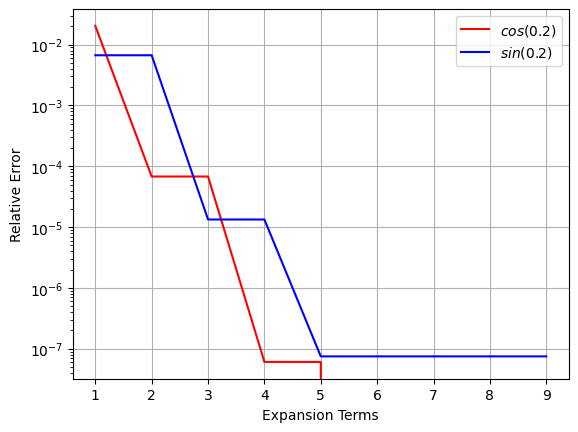

### Task 3 - Truncation Error - Maclaurin Series - Part II

Repeat Task 2 but this time prepare plots that show the relative error with repsect to the deviation from 0 (so from 0.02 to 0.5 with step equal to 0.02) for the following number of expansions terms: (i) 2, (ii) 4, (iii) 6.

Similarly to the previous task - show the error using matplotlib.

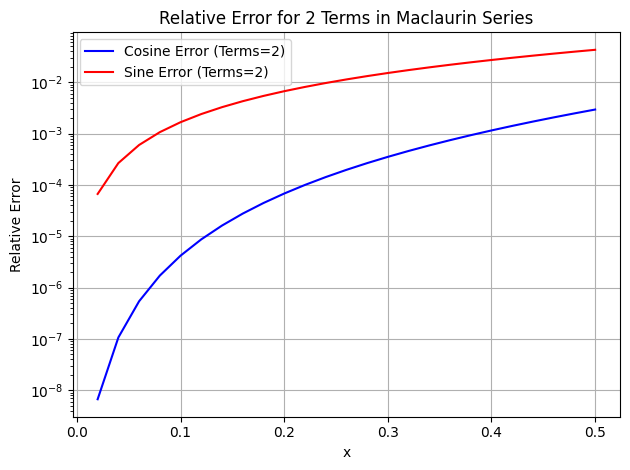

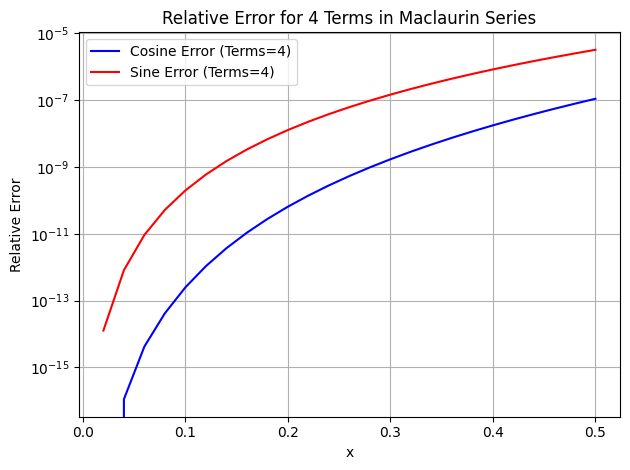

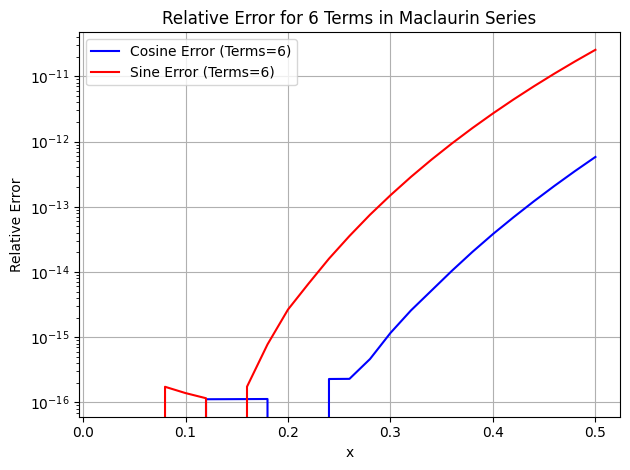

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def calculate_cos_error(x, num_terms):
    true_cos_value = math.cos(x)
    approx_cos = 1.0
    for i in range(1, num_terms):
        sign = (-1)**i
        approx_cos += sign * (x**(2*i)) / math.factorial(2*i)
    error = np.abs((true_cos_value - approx_cos) / true_cos_value)
    return error

def calculate_sin_error(x, num_terms):
    true_sin_value = math.sin(x)
    approx_sin = 0.0
    for i in range(1, num_terms):
        sign = (-1)**(i-1)
        approx_sin += sign * (x**(2*i-1)) / math.factorial(2*i-1)
    error = np.abs((true_sin_value - approx_sin) / true_sin_value)
    return error

x_values = np.arange(0.02, 0.52, 0.02)

terms = [2, 4, 6]

for num_terms in terms:
    cos_errors = [calculate_cos_error(x, num_terms) for x in x_values]
    sin_errors = [calculate_sin_error(x, num_terms) for x in x_values]

    plt.plot(x_values, cos_errors, label=f'Cosine Error (Terms={num_terms})', color='red')
    plt.plot(x_values, sin_errors, label=f'Sine Error (Terms={num_terms})', color='blue')

    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.title(f'Relative Error for {num_terms} Terms in Maclaurin Series')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


Expeceted output:

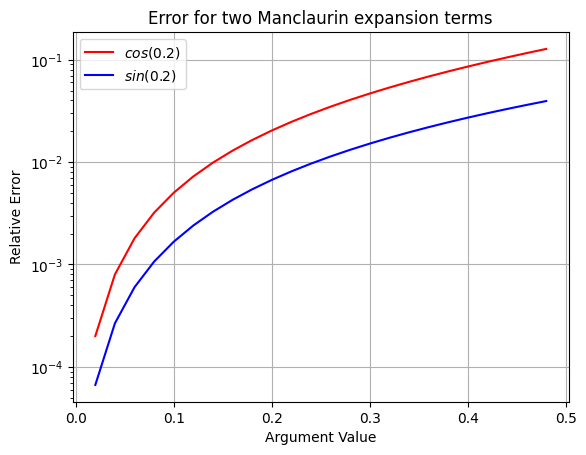

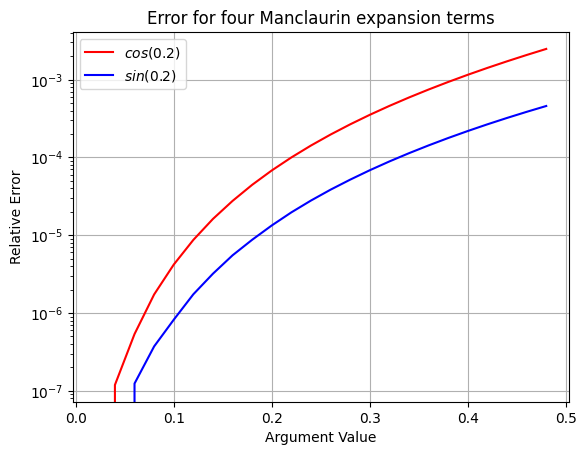

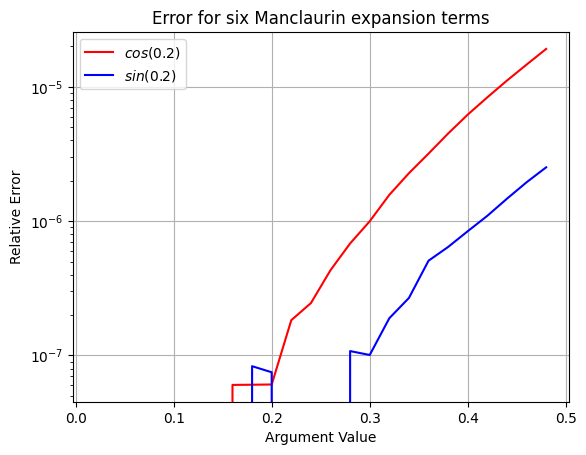

You can observe that the further the value from the known value (0.0) the larger the truncation error. Moreover, the more the expansion terms - the lower the error.

### Task 4 - Iterative Methods & Iterative Errors

During the lecture we were presenting the Heron's method as an example of iterative approximation of square roots.

In this task, implement another iterative method called Bisection Method that can be used to find roots of continuous functions.

Implement a function called bisection_method that takes the following arguments: (i) function for which we should find the root, (ii) start point, (iii) end point, (iv) data type. Ensure that the root lies between the start and end points.

Estimate the errors of the Bisection method using the following data types: float16, float32, float64.

In [ ]:
from typing import Callable

def bisection_method(function: Callable, start_point: float, end_point: float, dtype):

    start_point = np.array(start_point, dtype=dtype)
    end_point = np.array(end_point, dtype=dtype)

    tolerance = 1e-6

    iteration = 0

    while (end_point - start_point) > tolerance:
        midpoint = (start_point + end_point) / 2.0

        f_mid = function(midpoint)

        if np.abs(f_mid) < tolerance:
            break
        if function(start_point) * f_mid < 0:
            end_point = midpoint
        else:
            start_point = midpoint
        iteration += 1

    return midpoint



Test your code (repeat for all three data types):

In [ ]:
function_1 = lambda x: x**2 - 4
function_2 = lambda x: x**1.8 - 1.419823912132123219
function_3 = lambda x: np.sin(x + 0.4721321323213754223)

root_1_float32 = bisection_method(function_1, 0, 5, np.float32)
root_2_float32 = bisection_method(function_2, 0, 4, np.float32)
root_3_float32 = bisection_method(function_3, -1, 1, np.float32)

root_1_float64 = bisection_method(function_1, 0, 5, np.float64)
root_2_float64 = bisection_method(function_2, 0, 4, np.float64)
root_3_float64 = bisection_method(function_3, -1, 1, np.float64)

root_1_float16 = bisection_method(function_1, 0, 5, np.float16)
root_2_float16 = bisection_method(function_2, 0, 4, np.float16)
root_3_float16 = bisection_method(function_3, -1, 1, np.float16)

print(f"Root for function 1 (float32): {root_1_float32}")
print(f"Root for function 2 (float32): {root_2_float32}")
print(f"Root for function 3 (float32): {root_3_float32}")

print(f"Root for function 1 (float64): {root_1_float64}")
print(f"Root for function 2 (float64): {root_2_float64}")
print(f"Root for function 3 (float64): {root_3_float64}")

print(f"Root for function 1 (float16): {root_1_float16}")
print(f"Root for function 2 (float16): {root_2_float16}")
print(f"Root for function 3 (float16): {root_3_float16}")


Root for function 1 (float32): 1.9999998807907104
Root for function 2 (float32): 1.2149953842163086
Root for function 3 (float32): -0.47213172912597656
Root for function 1 (float64): 1.9999998807907104
Root for function 2 (float64): 1.2149953842163086
Root for function 3 (float64): -0.47213172912597656
Root for function 1 (float16): 1.9999998807907104
Root for function 2 (float16): 1.2149953842163086
Root for function 3 (float16): -0.47213172912597656
